In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ctr = pd.read_csv (r'C:\Users\DUONG\Desktop\project\population\countries.csv')
print (ctr)

      id                       name      continent
0      1                    Bermuda  North America
1      2                     Canada  North America
2      3                  Greenland  North America
3      4                     Mexico  North America
4      5  Saint Pierre and Miquelon  North America
..   ...                        ...            ...
209  210   Timor-Leste (East Timor)           Asia
210  211                      Tonga        Oceania
211  212       U.S. Pacific Islands        Oceania
212  213                    Vanuatu        Oceania
213  214                    Vietnam           Asia

[214 rows x 3 columns]


In [3]:
print(ctr.dtypes)

id            int64
name         object
continent    object
dtype: object


In [4]:
plt = pd.read_csv (r'C:\Users\DUONG\Desktop\project\population\population_years.csv')
print (plt)

        id  population  year  country_id
0        1     0.06306  2000           1
1        2     0.06361  2001           1
2        3     0.06418  2002           1
3        4     0.06476  2003           1
4        5     0.06534  2004           1
...    ...         ...   ...         ...
2338  2339    85.47054  2006         214
2339  2340    86.51885  2007         214
2340  2341    87.55836  2008         214
2341  2342    88.57676  2009         214
2342  2343    89.57113  2010         214

[2343 rows x 4 columns]


In [5]:
print(plt.dtypes)

id              int64
population    float64
year            int64
country_id      int64
dtype: object


In [6]:
#Question no.1: How many entries in the countries table are from Asia?

In [7]:
Asian_ctr = sum(1 for i in ctr['continent'] if i == 'Asia')
print(Asian_ctr)

51


In [8]:
#Question no.2: What was the total population of the continent of Asia over years?

In [9]:
#Get all the country with the continent of Asia
Asia_ct = ctr[ctr['continent']=='Asia']
print(Asia_ct)

      id                      name continent
56    57                    Cyprus      Asia
83    84                    Turkey      Asia
85    86                   Armenia      Asia
86    87                Azerbaijan      Asia
89    90                   Georgia      Asia
90    91                Kazakhstan      Asia
91    92                Kyrgyzstan      Asia
96    97                Tajikistan      Asia
97    98              Turkmenistan      Asia
99   100                Uzbekistan      Asia
100  101                   Bahrain      Asia
101  102                      Iran      Asia
102  103                      Iraq      Asia
103  104                    Israel      Asia
104  105                    Jordan      Asia
105  106                    Kuwait      Asia
106  107                   Lebanon      Asia
107  108                      Oman      Asia
108  109                 Palestine      Asia
109  110                     Qatar      Asia
110  111              Saudi Arabia      Asia
111  112  

In [10]:
#Sum up the population of the country with id in the list as above
Asia_pop = plt[plt['country_id'].isin(Asia_ct['id'])]
Asia_Total = Asia_pop['population'].sum(skipna=True)
print(Asia_Total)

43060.62809


In [11]:
#Question no.3: What was the average population of the continent of Asia in 2008?

In [12]:
#Get the population of Asian countries in 2008
Asia_2008 = Asia_pop[Asia_pop['year']==2008]
print(Asia_2008)

        id  population  year  country_id
613    614     1.06682  2008          57
910    911    75.79384  2008          84
932    933     2.96859  2008          86
943    944     8.17772  2008          87
976    977     4.63084  2008          90
987    988    15.34053  2008          91
998    999     5.35687  2008          92
1053  1054     7.21188  2008          97
1064  1065     4.82933  2008          98
1086  1087    27.34503  2008         100
1097  1098     0.71917  2008         101
1108  1109    75.02536  2008         102
1119  1120    28.22144  2008         103
1130  1131     7.11236  2008         104
1141  1142     6.13263  2008         105
1152  1153     2.59806  2008         106
1163  1164     4.03802  2008         107
1174  1175     2.85388  2008         108
1185  1186     3.90788  2008         109
1196  1197     0.82479  2008         110
1207  1208    24.91741  2008         111
1218  1219    21.32486  2008         112
1229  1230     4.62140  2008         113
1240  1241    22

In [13]:
Asian_sum08 = Asia_2008['population'].sum()
Asian_count08 = Asia_2008['population'].count() 
print(Asian_sum08/Asian_count08)                                                    #Average=Sum/Count

79.36306431372547


In [14]:
#Question no.4: Compare the total population of Asia with other continent

In [15]:
#Create a new dataframe that have population and continent information
merged_plt = pd.merge(left=plt, right=ctr, left_on='country_id', right_on='id')
cont = merged_plt.loc[:, ['population','continent']]
print(cont)

      population      continent
0        0.06306  North America
1        0.06361  North America
2        0.06418  North America
3        0.06476  North America
4        0.06534  North America
...          ...            ...
2338    85.47054           Asia
2339    86.51885           Asia
2340    87.55836           Asia
2341    88.57676           Asia
2342    89.57113           Asia

[2343 rows x 2 columns]


In [16]:
#Group the total population by continent
bycont = cont.groupby('continent')
print(bycont.sum())

                population
continent                 
Africa          9972.25333
Asia           43060.62809
Europe          7991.48186
North America   5643.75671
Oceania          359.47808
South America   4096.11401


array([<AxesSubplot:ylabel='population'>], dtype=object)

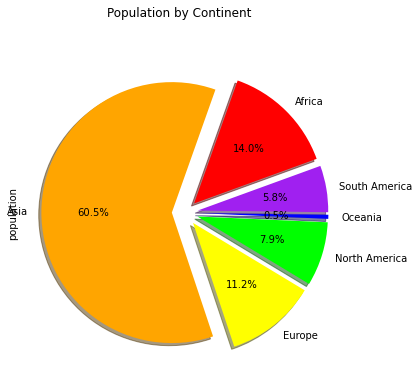

In [18]:
#Draw a pie chart to show the comparison
chart01=bycont.sum()
chart01.plot.pie(subplots=True, title = "Population by Continent", figsize =(6,6), legend = False, colors = ('#FF0000','#FFA500','#FFFF00','#00FF00','#0000FF','#A020F0'), explode =(0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct='%1.1f%%', shadow = True, startangle = 20, counterclock = True)

In [ ]:
#Question no.4: Compare the number of countries of Asia with other continent